# Linear Regression

$$\hat{y}=\theta_{0}+\sum_{i=1}^{n}{\theta_{i}x_{i}}$$

- $\hat{y}$: predicted value
- n: number of features
- $x_i$: feature value
- $\theta_i$: $i^{th}$ model parameter

Using vector notation:
$$\hat{y}=\theta^{T}X$$

A set of parameters that minimize the Root Mean Square Error (RMSE) also minimize the Mean Square Error (MSE):
$$MSE(\textbf{X},h(\theta))=\frac{1}{m}\sum_{i=1}^{m}\left(\theta^{T}X^{(i)}-y^{(i)}\right)^{2}$$
This is the cost function for a linear regression. To simplify, it can be noted as $MSE(\theta)$

If we have a set of feature values and the actual output values, and we want to find the set of parameters that best describes the system, we can note this as:
$$X^{T}\theta=y$$
We cannot assure that there is a set of $\theta$ that generates $y$, but we can find the model parameters that best fit the problem:
$$XX^{T}\hat{\theta}=X^{T}y$$
$XX^{T}$ is always invertible, so:
$$\hat{\theta}=(XX^{T})^{-1}X^{T}y$$

In [1]:
#As an example:
import numpy as np

X = 2 * np.random.rand(100, 1) #column vector of 100 random numbers in [0,2)
y = 4 + 3 * X + np.random.randn(100, 1) #theta should be [4, 3] + noise

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[3.92797927]
 [3.00027413]]


In [3]:
#using the parameters found:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict) #y = [min_value, max_value]

[[3.92797927]
 [9.92852753]]


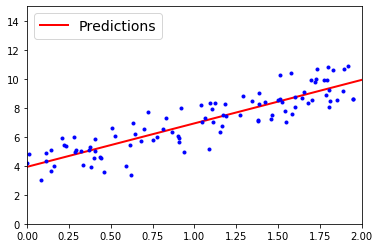

In [4]:
#plotting the model:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
#The same stuff with sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ #AKA theta[0], theta[1:]

(array([3.92797927]), array([[3.00027413]]))

# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.<br>
It starts by filling θ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.<br>
Some considerations:<br>
   - The minimum can be a local one, it's not guaranteed that it's the global
   - For non-continous functions, the algorirm may not converge
   - If some variable has a much bigger slope than the others, it will has more weight. Hence, the algoritm will try to fit it better before going to the others. It is highly recommended that the features have a similar scale
   - The more parameters the model has, the longer it takes for the algoritm to converge
   

In this case, we want to minimize the MSE function, to do it, we have to do the gradient:
$$\frac{\partial}{\partial\theta_{j}}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}\left(\theta^{T}X^(i)-y^{(i)}\right)x_{j}^{(i)}$$

The gradient vector, noted $\nabla_{\theta}MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter):
$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^{T}\left(X\theta-y\right)$$

#### $\color{red}{\text{At each step, Gradient Descent algoritm uses the whole Train Set. This is why the algoritm is slow for large amount of training data.}}$

However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once the gradient is available, the iteration part comes next:
$$\theta^{(k+1)}=\theta^{(k)}-\eta MSE(\theta^{(k)})$$
Where $\eta$ represents the *learning rate* and the minus operator means that we are moving against the gradient.

In [6]:
eta = 0.1  # learning rate
n_iterations = 1000 #max iterations
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[3.92797927]
 [3.00027413]]


If the learning rate is low, the algoritm takes too long to converge<br>
If it's high, it may diverge<br>
Finding a proper value is possible with a grid search, limitating the amount of iterations to discard those values that takes too much time to converge.

One improvement is to add a $\epsilon$ value that represent the variation $\theta$ has in this iteration, if it's lower than a threshold you can break the iteration.

### Stochastic Gradient Descent

What if, instead of picking the whole train set each iteration, we rendomly pick just one?<br>
**Obviously**, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration <br>
**On the other hand**, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down.<br>


Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.

In [7]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)

[[3.92165725]
 [2.99439796]]


In [8]:
#with sklearn:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.86044181] [2.92722142]


Another variant is **Mini-batch Gradient Descent**. This variation rendomly takes a set of training values each iteration.
It's a combination of the previous two algoritms. It's faster than Batch and performs better than Stochastic.<br>
But it may not converge in the minimum and it can be stuck in a local point.

# Polynomial regression

Add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.94522143] [[1.10286331 0.42713956]]


In [12]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

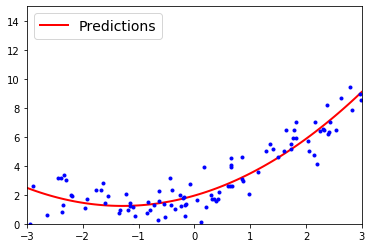

In [13]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 15])
plt.show()

# Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. 

### Ridge Regression

Regularized version of Linear Regression: a regularization term equal to $\alpha\sum_{i=1}^{n}{\theta_{i}^{2}}$ is added to the cost function. Note that $i$ starts at 1, the bias term is not regularized.<br>
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.<br>
The hyperparameter α controls how much you want to regularize the model. If α = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean. 
$$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}{\theta_{i}^{2}}$$

<font color='red'> It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.</font>

$$\hat{\theta}=(XX^{T}+\alpha A)^{-1}X^{T}y$$<br>
Where $A$ is a $(n+1)x(n+1)$ identity matrix except for the first value that corresponds to the bias parameter

In [14]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

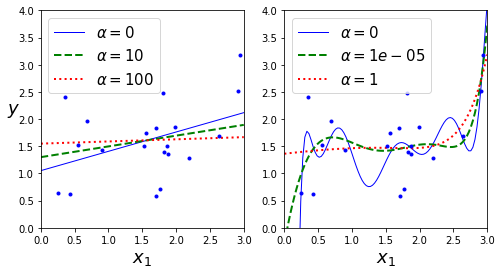

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

### Lasso regression

$\textit{Least Absolute Shrinkage and Selection Operator Regression}$ is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $ℓ_1$ norm of the weight vector instead of half the square of the $ℓ_2$ norm 

$$ J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}{|\theta_{i}|} $$

C:\Users\msyitay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6442465330226224, tolerance: 0.0009033158929183678
  positive)


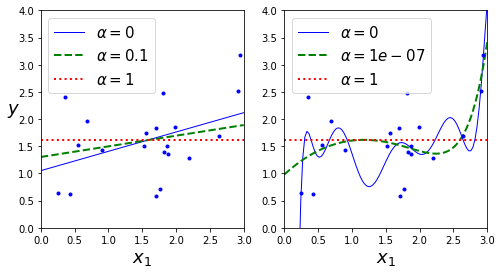

In [16]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero).<br>
In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

### Elastic Net

Elastic Net is a middle ground between $\textit{Ridge Regression}$ and $\textit{Lasso Regression}$. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to $\textit{Ridge Regression}$, and when $r = 1$, it is equivalent to $\textit{Lasso Regression}$.

$$J(\theta)=MSE(\theta)+r\alpha \sum_{i=1}^{n}|\theta_{i}|+\frac{1-r}{2}\alpha \sum_{i=1}^{n}\theta_{i}^{2}$$

In [17]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.59226556])

C:\Users\msyitay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6442465330226224, tolerance: 0.0009033158929183678
  positive)


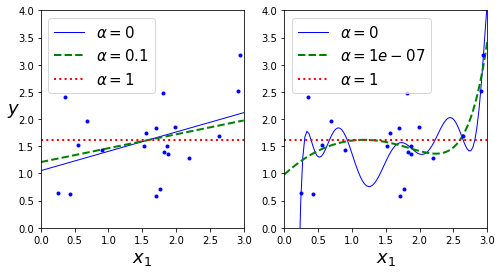

In [18]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

### When to use each one?

It's always better to have, at least, a bit of regularization. <br>
Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.<br>
Regardeless of the regularization used, it's always more performant if a scaler is used.

### Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.

In [31]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

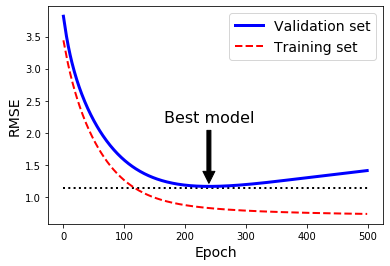

In [32]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”<br>
With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

## Logistic Regression

Commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the <i>positive class</i>, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the <i>negative class</i>, labeled “0”). This makes it a <b>binary classifier</b>.<br>
Instead of comptuting a result, the logistic regression's output is the <i>logistic</i> of this result.

$$\hat{p}=h_{\theta}(X)=\sigma(X^{T}\theta)$$

Where $\sigma$ is a <i>sigmoid function</i> that outputs a number between 0 and 1:
$$\sigma(t)=\frac{1}{1+e^{t}}$$

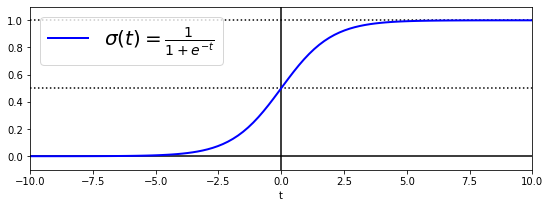

In [33]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()

Once the Logistic Regression model has estimated the probability $\hat{p} = h_{\theta}(X)$ that an instance $X$ belongs to the positive class, it can make its prediction $\hat{y}$ easily:<br>
$$\hat{y}= \bigg\{
\begin{matrix} 
 0 & \text{ if } \hat{p}<0.5 \\
 1 & \text{ if } \hat{p} \geq 0.5
\end{matrix} $$
Loking at the graphic, $\hat{y}=1$ if and only if $t=X^{T}\theta$ is negative and $\hat{y}=0$ only if $X^{T}\theta$ is possitive.

## Train
The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$). This idea is captured by the cost function for a single training instance $X$:
$$C(\theta)=\bigg\{
\begin{matrix}
    -\log(\hat{p}) & \text{ if } y=1\\
    -\log(1-\hat{p}) &  \text{ if } y=0\\
\end{matrix}$$

This cost function makes sense because –log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, –log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the <i>log loss</i>:
$$J(\theta)=−\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log(\hat{p}^{(i)})+\left(1−y^{(i)}\right)\log(1−\hat{p}^{(i)})\right]$$

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function. The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

$$\frac{\partial}{\partial\theta_{j}}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(\sigma\left(\theta^{T}X^{(i)}\right)−y^{(i)}\right)x^{(i)}_{j}$$

For each instance it computes the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm.

### Hands on Logistic Regression

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [35]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [40]:
#the classifier will take the petal width and try to classify for Class2: Iris virginica

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

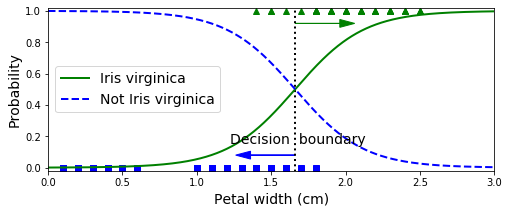

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

In [45]:
decision_boundary

array([1.66066066])

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident)

In [46]:
#now let's try to classify using the petals lenght and the width
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

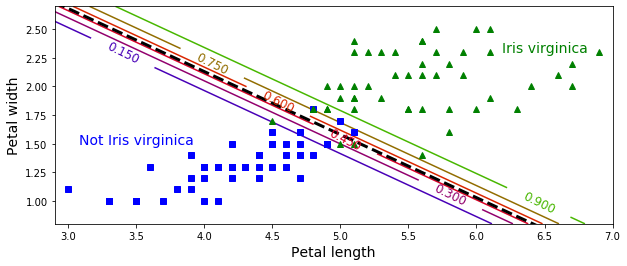

In [47]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary.16 Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model.

## Softmax Regression

What if you want to classify more than two classes? It's not neccesary to run multiple binary classifiers in cascade.
The idea is simple: when given an instance <b>x</b>, the <i>Softmax Regression</i> model first computes a score $s_{k}(x)$ for each class <i>k</i>, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_{k}(x)$ should look familiar, as it is just like the equation for Linear Regression prediction:
$$s_{k}(X)=X^{T}\theta^{(k)}$$
Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a parameter matrix $\Theta$.

Once you have computed the score of every class for the instance <b>x</b>, you can estimate the probability $\hat{p}_{k}$ that the instance belongs to class <i>k</i> by running the scores through the softmax function. The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called <i>logits</i> or <i>log-odds</i> (although they are actually unnormalized log-odds).
$$\hat{p}_{k}=\sigma(s(x))_{k}=\frac{e^{s_{k}(x)}}{\sum_{j=1}^{K}e^{s_{j}(x)}}$$

Where:
<ul>
  <li>$K$: number of classes</li>
  <li>$s(x)$:vector containing the scores of each class for the instance x</li>
  <li>$\sigma(s(x))_{k}$: estimated probability that the instance x belongs to class k, given the scores of each class for that instance</li>
</ul>

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score):

$$\hat{y}={argmax \atop k} \sigma(s(x))_{k}={argmax \atop k} s_{k}(x)={argmax \atop k}((\theta^{(k)})^{⊺}x)$$

### Train the model
The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes).
$$J(\Theta)=−\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}\log(\hat{p}^{(i)}_{k})$$

Minimizing this cost function, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

The gradient of this function is:
$$\nabla_{\theta^{k}}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\hat{p}^{(i)}_{k}−y^{(i)}_{k})x^{(i)}$$

With this we can use gradient descent algorithm to compute

In [48]:
#Set the multi_class parameter
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))


[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


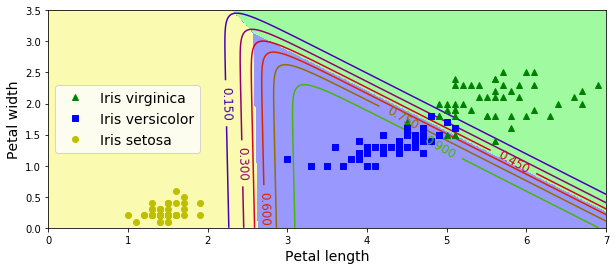

In [50]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()